In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt 

In [2]:
df = pd.read_csv("05L_Excel__TelcoCustomer.csv",sep = ';')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.shape

(7043, 21)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"])

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# now we realize there are null values after we changed the data type to numeric, lets fill the data

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# how do we decide how to fill? correlation? mean? 

In [17]:
#filling null values with median

df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace = True)

In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# bar charts 

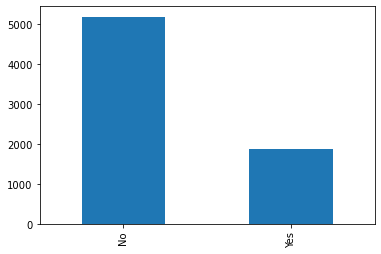

In [21]:


df["Churn"].value_counts().plot(kind = 'bar')

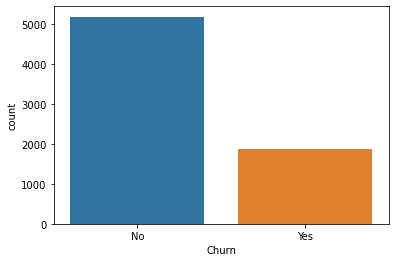

In [24]:
#another way of showing the data - countplot 

sns.countplot(data = df, x="Churn");

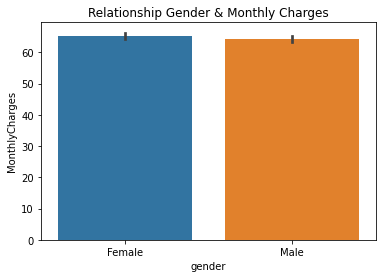

In [25]:
# gender monthly charge relationship

sns.barplot(x=df["gender"], y=df["MonthlyCharges"])
plt.title("Relationship Gender & Monthly Charges")
plt.show()

In [26]:
df.groupby("gender").agg({"MonthlyCharges" : "mean"})

,MonthlyCharges
gender,
Female,65.204243
Male,64.327482


In [27]:
# monthly charges and churn rate relationship

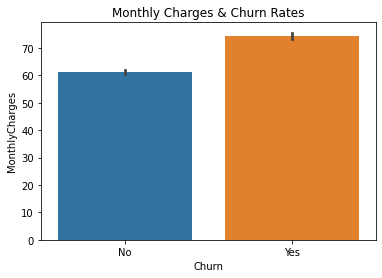

In [28]:
# monthly charges and churn relationship

sns.barplot(x=df["Churn"], y=df["MonthlyCharges"])
plt.title("Monthly Charges & Churn Rates")
plt.show()

In [29]:
df.groupby("Churn").agg({"MonthlyCharges": "mean"})

,MonthlyCharges
Churn,
No,61.265124
Yes,74.441332


## countplots

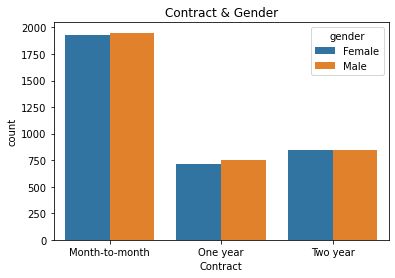

In [32]:
# contract type & gender relation

sns.countplot(x=df["Contract"], data=df, hue = "gender")
plt.title("Contract & Gender")
plt.show()

In [33]:
df.groupby("Contract").agg({"gender" : "count"})

,gender
Contract,
Month-to-month,3875
One year,1473
Two year,1695


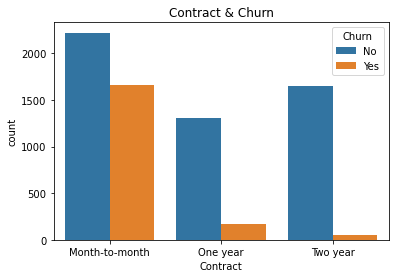

In [34]:
sns.countplot(x=df["Contract"], data = df, hue = "Churn")
plt.title("Contract & Churn")
plt.show()

In [35]:
df.groupby(["Contract", "gender"]).agg({"Churn" : "count"})

Churn
Contract       gender       
Month-to-month Female   1925
               Male     1950
One year       Female    718
               Male      755
Two year       Female    845
               Male      850

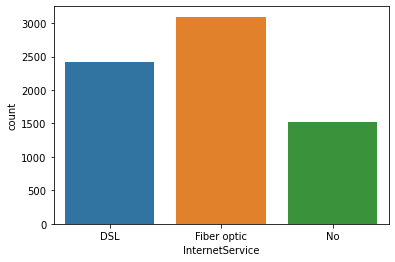

In [36]:
# internet service & churn rate relationship

sns.countplot(x=df["InternetService"], data=df)
plt.show()

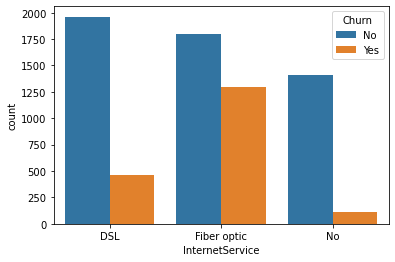

In [37]:
sns.countplot(x=df["InternetService"], data=df, hue="Churn")
plt.show()

# is there an issue about the quality of my fiber optic maintenance?

In [38]:
df.groupby("InternetService").agg({"Churn": "count"})

,Churn
InternetService,
DSL,2421
Fiber optic,3096
No,1526


# horizontal bars 

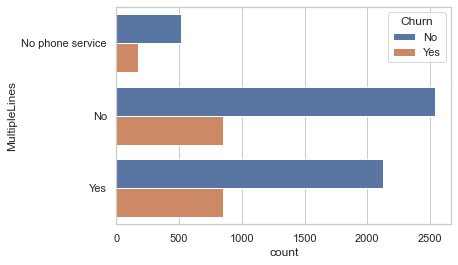

In [41]:
 # multiple lines & churn relationship
    
    
sns.set_theme(style="whitegrid") #horizontal bars
sns.countplot(y=df["MultipleLines"], hue=df["Churn"])
plt.show()

In [42]:
df.groupby("MultipleLines").agg({"Churn" : "count"})

,Churn
MultipleLines,
No,3390
No phone service,682
Yes,2971


# Histograms

In [45]:
num_col = [col for col in df.columns if (df[col].dtype in ["int64", "float64"]) & (df[col].nunique() > 10)]
num_col

['tenure', 'MonthlyCharges', 'TotalCharges']

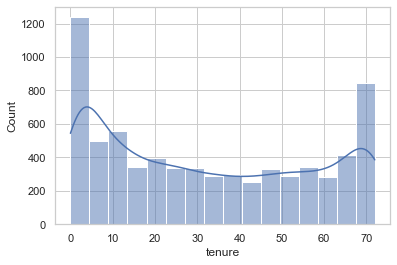

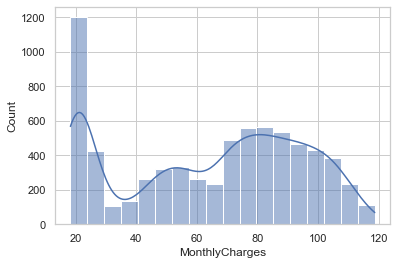

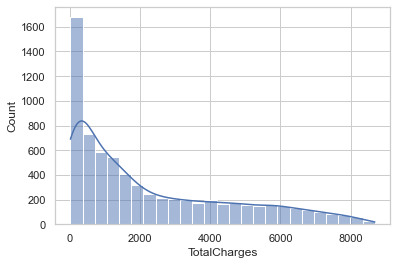

In [46]:
for col in num_col:
    sns.histplot(data = df, x=col, kde =True)
    plt.show()

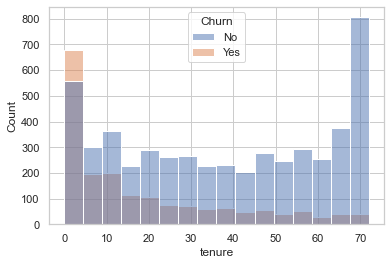

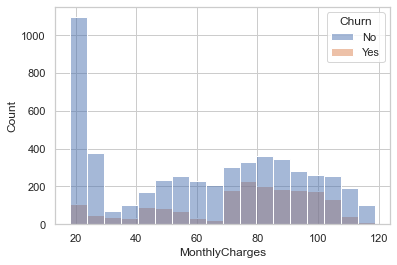

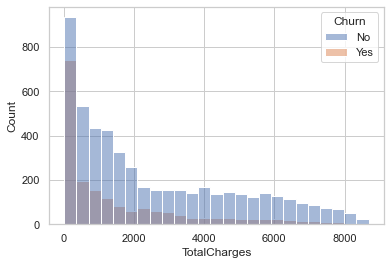

In [47]:
for col in num_col:
    sns.histplot(data = df, x=col, hue = "Churn")
    plt.show()

# boxplots

/Users/elcdindar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


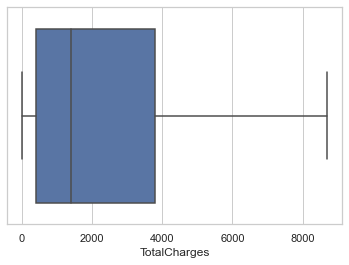

In [48]:
sns.boxplot(df["TotalCharges"]);

/Users/elcdindar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


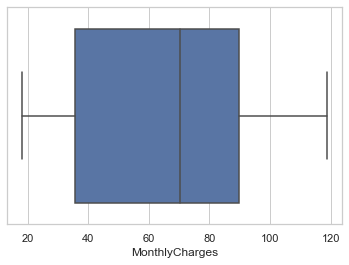

In [49]:
sns.boxplot(df["MonthlyCharges"]);

/Users/elcdindar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


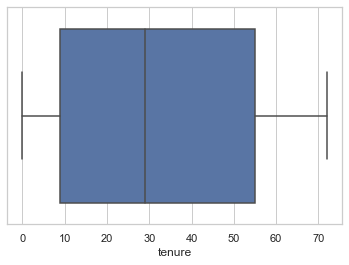

In [50]:
sns.boxplot(df["tenure"]);

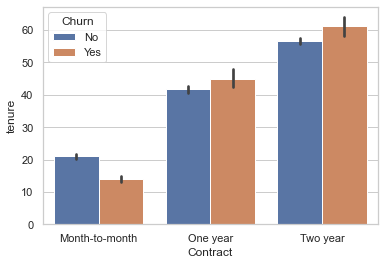

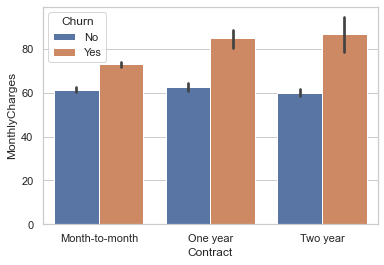

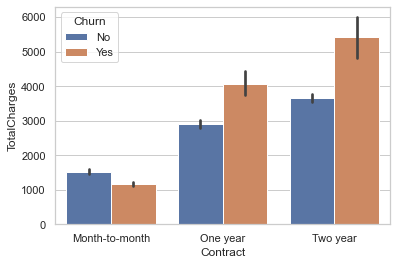

In [52]:
for col in num_col:
    sns.barplot(x=df["Contract"], y=df[col], hue = df["Churn"])
    plt.show()

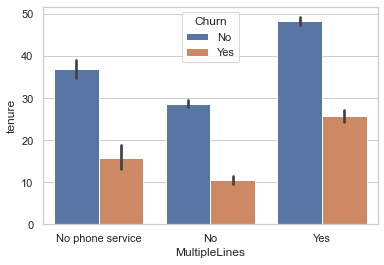

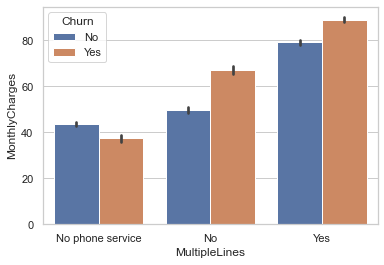

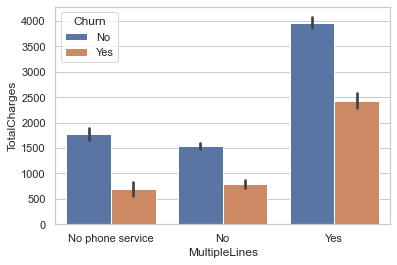

In [53]:
for col in num_col:
    sns.barplot(x=df["MultipleLines"], y=df[col], hue = df["Churn"])
    plt.show()

In [55]:
df.groupby(["Contract"]).agg({"TotalCharges" : "mean",
                             "MonthlyCharges" : "mean",
                             "tenure" : "mean",
                             "Churn" : "count"})

,TotalCharges,MonthlyCharges,tenure,Churn
Contract,,,,
Month-to-month,1369.254581,66.398490,18.036645,3875
One year,3033.571606,65.048608,42.044807,1473
Two year,3715.179027,60.770413,56.735103,1695


In [56]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# pie charts

In [57]:
pd.DataFrame({
    "Churn" : df["Churn"].value_counts(),
    "Ratio": 100 * df["Churn"].value_counts()/len(df)
})

,Churn,Ratio
No,5174,73.463013
Yes,1869,26.536987


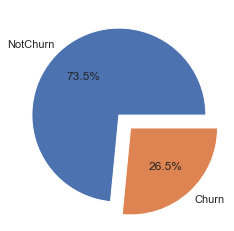

In [58]:
plt.pie(df["Churn"].value_counts().values, [0,0.2], ["NotChurn", "Churn"], autopct = "%1.1f%%")
plt.show()

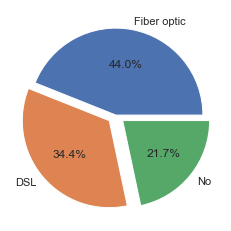

In [61]:
labels = df["InternetService"].value_counts().index
sizes  = df["InternetService"].value_counts().values
explode = [0, 0.1, 0.1]

plt.pie(sizes, explode, labels, autopct = "%1.1f%%")
plt.show()


# scatterplots

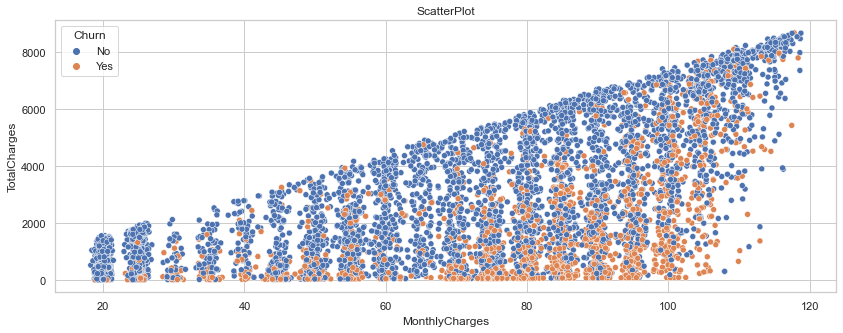

In [62]:
# scatterplots 

plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = "MonthlyCharges", y = "TotalCharges", hue = "Churn")

plt.title("ScatterPlot")
plt.show()

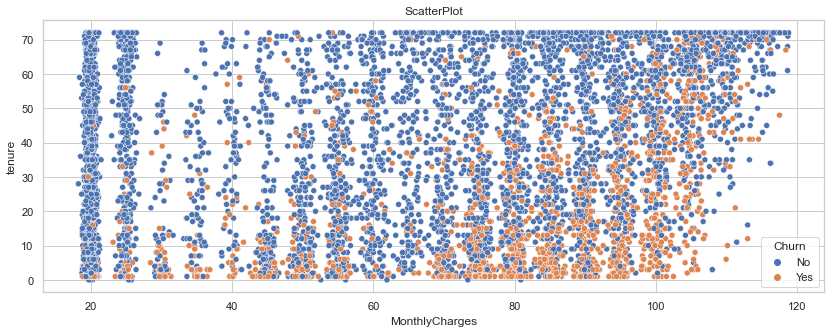

In [63]:
plt.figure(figsize = (14, 5))
sns.scatterplot(data = df, x = "MonthlyCharges", y = "tenure", hue = "Churn")

plt.title("ScatterPlot")
plt.show()

In [65]:
df.groupby("Churn").agg({"MonthlyCharges" : "mean", "TotalCharges" : "mean"})

,MonthlyCharges,TotalCharges
Churn,,
No,61.265124,2552.882494
Yes,74.441332,1531.796094


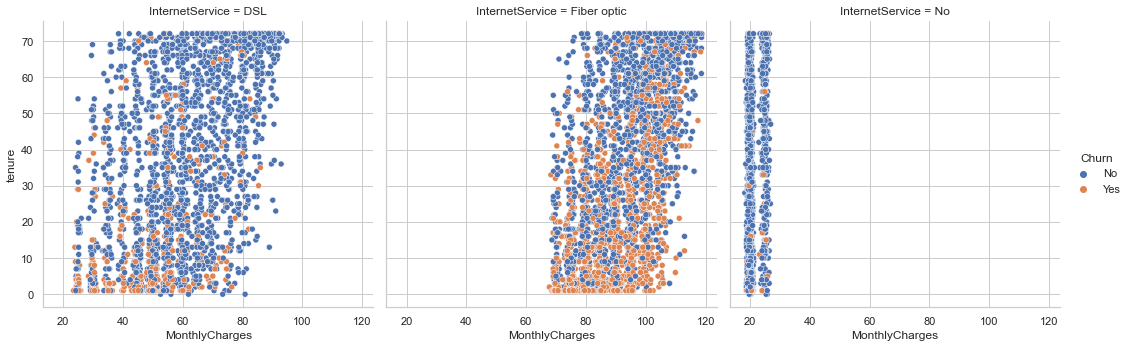

In [68]:
#relationship between monthly charges, tenure, churn for different internet services

sns.relplot(data = df, x="MonthlyCharges", y = "tenure", hue="Churn", col = "InternetService");

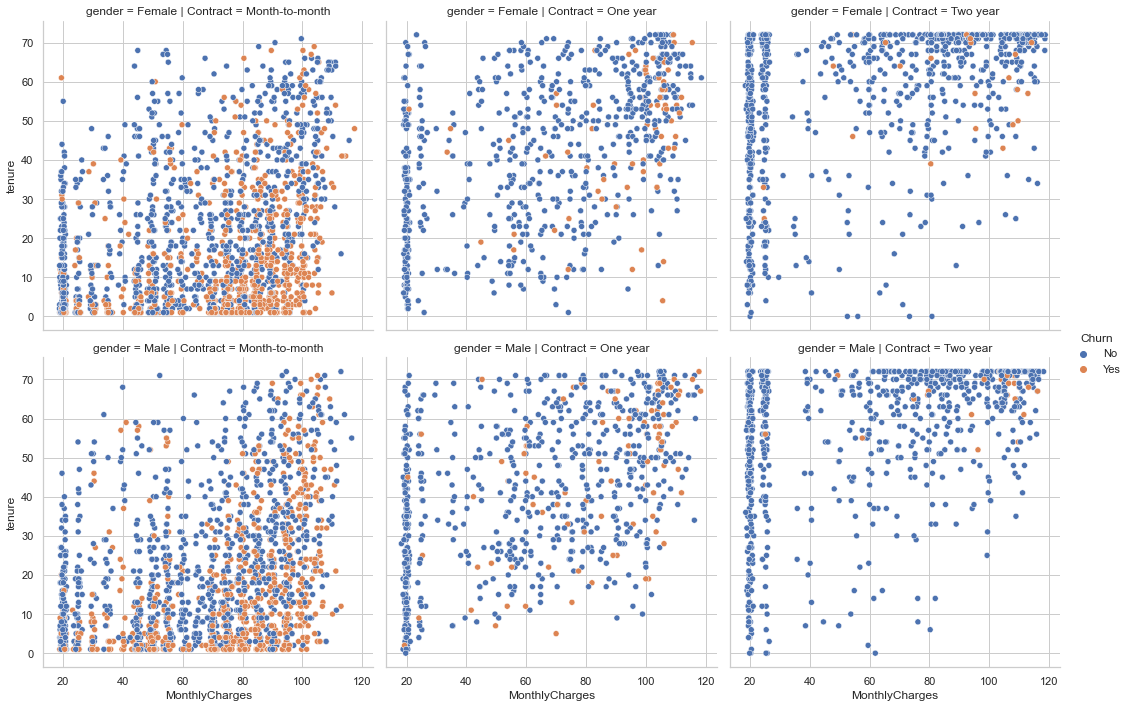

In [76]:
 #relationship between monthly charges, tenure, churn rates for different contract types and gender
    
sns.relplot(data = df, x="MonthlyCharges", y = "tenure", hue="Churn", col = "Contract", row= "gender");

In [77]:
df2 = df[["MonthlyCharges", "Contract", "tenure", "gender", "Churn", "InternetService"]]
df2.head()

,MonthlyCharges,Contract,tenure,gender,Churn,InternetService
0,29.85,Month-to-month,1,Female,No,DSL
1,56.95,One year,34,Male,No,DSL
2,53.85,Month-to-month,2,Male,Yes,DSL
3,42.30,One year,45,Male,No,DSL
4,70.70,Month-to-month,2,Female,Yes,Fiber optic


## pairplots

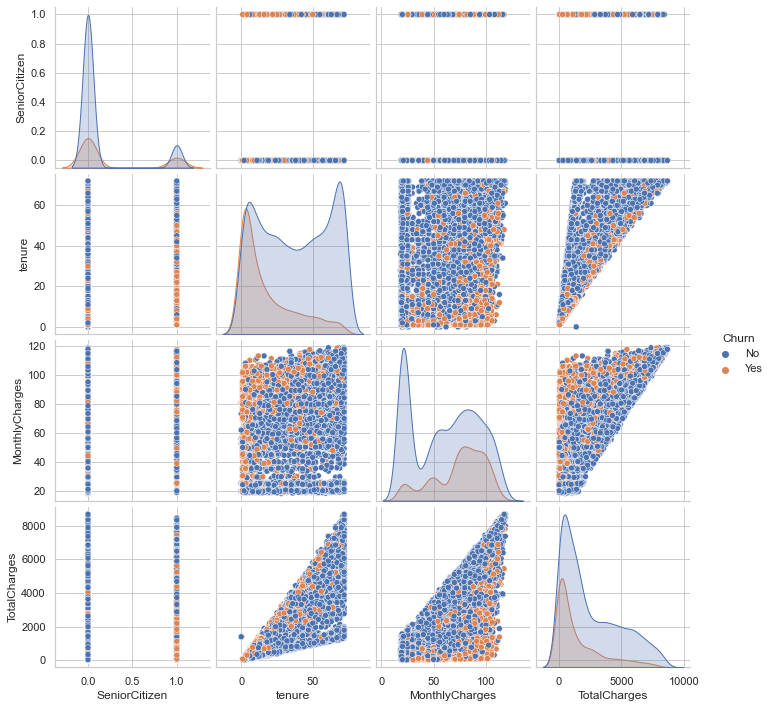

In [79]:
sns.pairplot(df, hue = "Churn");

In [81]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


# heatmaps

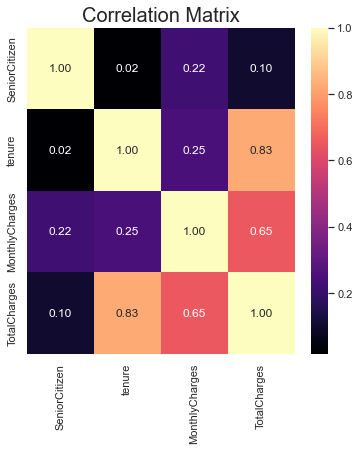

In [82]:
f, ax = plt.subplots(figsize = [6,6])
sns.heatmap(df.corr(), annot = True, fmt = ".2f", ax =ax, cmap = "magma")
ax.set_title("Correlation Matrix", fontsize = 20)
plt.show()